In [ ]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import glob

import tifffile as tf

import os

path = "/home/patrick/github/data"

filenames = glob.glob(os.path.join(path, "dm*/**/*.tif*"), recursive=True)

print(len(filenames))

In [ ]:
# filter lamella, landing

print(len(filenames))
# filenames = [fname for fname in filenames if "ref_landing" not in fname and "ref_lamella" not in fname and "trench" not in fname and "low_res" not in fname]

filenames = [fname for fname in filenames if "needle" in fname]
print(len(filenames))

In [ ]:
for fname in filenames[:10]:
    img = tf.imread(fname)
    plt.imshow(img, cmap="gray")
    plt.show()

In [ ]:
save_path = "/home/patrick/github/data/training"
for i, fname in enumerate(filenames):
    
    img = tf.imread(fname)
    new_fname = os.path.join(save_path,f"a{i:05d}.tif")

    tf.imsave(new_fname, img)


In [ ]:
train_filenames = sorted(glob.glob(os.path.join(save_path, "*.tif")))
for fname in train_filenames[:10]:

    img = tf.imread(fname)
    plt.imshow(img, cmap="gray")
    plt.show()

In [ ]:
import zarr

images = zarr.open(tf.imread(os.path.join("/home/patrick/github/data/training/", "images", "*.tif*"), aszarr=True)) 
labels = zarr.open(tf.imread(os.path.join("/home/patrick/github/data/training/", "labels","*.tif*"), aszarr=True))


print(images.shape)
print(labels.shape)


for img, label in zip(images, labels):


    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(img, cmap="gray")
    ax[1].imshow(label)
    plt.show()



### Model Testing

In [ ]:
%load_ext autoreload
%autoreload 2 


import glob
import os
import tifffile as tf
import matplotlib.pyplot as plt

images = sorted(glob.glob(os.path.join("/home/patrick/github/data/training/train/images", "*.tif*")))
labels = sorted(glob.glob(os.path.join("/home/patrick/github/data/training/train/labels", "*.tif*")))

for ii, (i, l) in enumerate(zip(images, labels)):
    print(os.path.basename(i), os.path.basename(l))

    img, lbl = tf.imread(i), tf.imread(l)

    fig, ax = plt.subplots(1, 2, figsize=(7, 5))
    ax[0].imshow(img, cmap="gray")
    ax[0].set_title("Image")
    ax[1].imshow(lbl)
    ax[1].set_title("Label")
    plt.show()
    
    if ii == 2:
        break



In [ ]:
filenames = sorted(glob.glob(os.path.join("/home/patrick/github/data/liftout/training/train/images/", "*.tif*")))

print("files: ", len(filenames))
# filenames.append(*list(sorted(glob.glob(os.path.join("/home/patrick/github/data/training/train/images/", "*.tif*")))
print("files: ", len(filenames))
import random
random.shuffle(filenames)


from fibsem.segmentation.model import SegmentationModel

baseline = "/home/patrick/github/fibsem/fibsem/segmentation/models/model.pt"
# checkpoint_2 = "/home/patrick/github/fibsem/fibsem/segmentation/models/03_11_2022_19_01_51_n08_model.pt"
# checkpoint_5 = "/home/patrick/github/fibsem/fibsem/segmentation/models/03_11_2022_19_00_58_n05_model.pt"
# checkpoint_10 = "/home/patrick/github/fibsem/fibsem/segmentation/models/03_11_2022_19_02_27_n10_model.pt"
# checkpoints = [baseline, checkpoint_2, checkpoint_5, checkpoint_10]

small_model = "/home/patrick/github/fibsem/fibsem/segmentation/models/model2.pt"
# checkpoint_10 = "/home/patrick/github/fibsem/fibsem/segmentation/models/combined/03_11_2022_20_00_10_n10_model.pt"
# checkpoint_15 = "/home/patrick/github/fibsem/fibsem/segmentation/models/combined/03_11_2022_20_09_22_n15_model.pt"
# checkpoint_20 = "/home/patrick/github/fibsem/fibsem/segmentation/models/combined/03_11_2022_20_18_32_n20_model.pt"

checkpoint_10 = "/home/patrick/github/fibsem/fibsem/segmentation/models/combined34/04_11_2022_18_37_32_n10_model.pt"
checkpoint_15 = "/home/patrick/github/fibsem/fibsem/segmentation/models/combined34/04_11_2022_18_46_48_n15_model.pt"
checkpoint_20 = "/home/patrick/github/fibsem/fibsem/segmentation/models/combined34/04_11_2022_18_56_00_n20_model.pt"


checkpoints = [baseline, small_model, checkpoint_10, checkpoint_15, checkpoint_20]
for i, fname in enumerate(filenames):

    img = tf.imread(fname)

    print(i, fname) 

    fig, ax = plt.subplots(1, len(checkpoints) + 1, figsize=(15, 5))
    ax[0].imshow(img, cmap="gray")
    ax[0].set_title("Image")


    titles = ["Baseline", "Update", "Checkpoint 10", "Checkpoint 15", "Checkpoint 20"]
    for j, (checkpoint, title) in enumerate(zip(checkpoints, titles), 1):
        model = SegmentationModel(checkpoint=checkpoint, num_classes=3)

        mask = model.inference(img)

        ax[j].imshow(mask)
        ax[j].set_title(title)

    save_path = "results34"
    os.makedirs(save_path, exist_ok=True)
    fig.savefig(os.path.join(save_path, f"{os.path.basename(fname).replace('tif', 'png')}"))

    plt.show()

### Pattern Testing


In [1]:
%load_ext autoreload
%autoreload 2

from fibsem import utils, patterning
import matplotlib.pyplot as plt

# protocol_path = "/home/patrick/github/autoliftout/liftout/protocol/protocol.yaml"
protocol_path = r"C:\Users\pcle0002\Documents\repos\autoliftout\liftout\protocol\protocol.yaml"
microscope, settings = utils.setup_session(protocol_path=protocol_path)

2023-03-12 21:23:07,204 — root — INFO — connect_to_microscope:3125 — Connected to Demo Microscope
2023-03-12 21:23:07,206 — root — INFO — setup_session:227 — Finished setup for session: autoliftout_2023-03-12-09-23-07PM


In [3]:
patterns_fn = {f"{pattern.name}": pattern for pattern in patterning.__PATTERNS__}

from pprint import pprint

pprint(patterns_fn)

{'Circle': <class 'fibsem.patterning.CirclePattern'>,
 'Fiducial': <class 'fibsem.patterning.FiducialPattern'>,
 'Horseshoe': <class 'fibsem.patterning.HorseshoePattern'>,
 'Line': <class 'fibsem.patterning.LinePattern'>,
 'MicroExpansion': <class 'fibsem.patterning.MicroExpansionPattern'>,
 'Rectangle': <class 'fibsem.patterning.RectanglePattern'>,
 'SpotWeld': <class 'fibsem.patterning.SpotWeldPattern'>,
 'Trench': <class 'fibsem.patterning.TrenchPattern'>,
 'Undercut': <class 'fibsem.patterning.UndercutPattern'>}


In [4]:
from fibsem.structures import FibsemPatternSettings, FibsemPattern

rect_pattern = patterns_fn["Rectangle"]()

rp = rect_pattern.define(protocol={"pattern": "Rectangle", "width": 10e-6, "height": 5e-6, 
                                              "depth": 2e-6, "rotation": 0, 
                                              "centre_x": 0, "centre_y": 0, 
                                              "scan_direction": "TopToBottom", "cleaning_cross_section": True})


print(rp)

Rectangle
[FibsemPatternSettings(pattern=FibsemPattern.Rectangle, width=1e-05, height=5e-06, depth=2e-06, rotation=0, centre_x=0.0, centre_y=0.0, scan_direction=TopToBottom, cleaning_cross_section=True)]


In [14]:



pattern_fn = patterns_fn["Trench"]()
print(pattern_fn.required_keys)
pattern = pattern_fn.define(protocol=settings.protocol["polish_lamella"])

pprint(pattern)

print("---------------------------------------")

('lamella_width', 'lamella_height', 'trench_height', 'size_ratio', 'offset', 'milling_depth')
[FibsemPatternSettings(pattern=FibsemPattern.Rectangle, width=1.7e-05, height=6e-07, depth=4e-07, rotation=0.0, centre_x=0.0, centre_y=-5.5e-07, scan_direction=BottomToTop, cleaning_cross_section=True),
 FibsemPatternSettings(pattern=FibsemPattern.Rectangle, width=1.7e-05, height=6e-07, depth=4e-07, rotation=0.0, centre_x=0.0, centre_y=5.5e-07, scan_direction=TopToBottom, cleaning_cross_section=True)]
---------------------------------------


In [ ]:
for p in patterns_fn:
    print(p, patterns_fn[p], patterns_fn[p]())

### Test AutoFOCUS



In [18]:
%load_ext autoreload
%autoreload 2

import sys
from fibsem import utils, calibration, patterning
from fibsem.structures import BeamType

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
microscope, settings = utils.setup_session()

2023-03-13 10:43:31,143 — root — INFO — connect_to_microscope:386 — Microscope client connecting to [10.0.0.1:7520]
Client connecting to [10.0.0.1:7520]...
Client connected to [10.0.0.1:7520]
2023-03-13 10:43:31,146 — root — INFO — connect_to_microscope:388 — Microscope client connected to [10.0.0.1:7520]
2023-03-13 10:43:31,147 — root — INFO — setup_session:227 — Finished setup for session: demo_2023-03-13-10-43-31AM


In [20]:
# default
calibration.auto_focus_beam(microscope, settings, beam_type=BeamType.ELECTRON)

2023-03-13 10:43:36,017 — root — INFO — auto_focus:504 — Running auto-focus on ELECTRON.


In [21]:
wd = microscope.get("working_distance", BeamType.ELECTRON)
print(f"working distance: {wd:2e}")

working distance: 4.000000e-03


In [22]:
# sharpness
from fibsem.calibration import _sharpness, _dog
calibration.auto_focus_beam(microscope=microscope, settings=settings, 
                            beam_type=BeamType.ELECTRON, 
                            metric_fn=_sharpness, kwargs={"disk_size": 5}, 
                            num_steps=20, step_size=0.05e-3)

2023-03-13 10:44:40,925 — root — INFO — auto_focus_beam:71 — image 0: 3.50e-03
2023-03-13 10:44:44,426 — root — INFO — set:1555 — ELECTRON working distance set to 0.0035 m.
2023-03-13 10:44:44,427 — root — WARNING — set:1652 — Unknown key: working_distance (BeamType.ELECTRON)
2023-03-13 10:44:44,428 — root — INFO — autocontrast:493 — Running autocontrast on ELECTRON.
2023-03-13 10:44:44,967 — root — INFO — acquire_image:432 — acquiring new ELECTRON image.
2023-03-13 10:44:45,835 — root — INFO — _sharpness:113 — calculating sharpness (accutance) of image <fibsem.structures.FibsemImage object at 0x000001D208E72B60>: 5
2023-03-13 10:44:45,867 — root — INFO — auto_focus_beam:71 — image 1: 3.55e-03
2023-03-13 10:44:49,332 — root — INFO — set:1555 — ELECTRON working distance set to 0.00355 m.
2023-03-13 10:44:49,333 — root — WARNING — set:1652 — Unknown key: working_distance (BeamType.ELECTRON)
2023-03-13 10:44:49,334 — root — INFO — autocontrast:493 — Running autocontrast on ELECTRON.
2023-

In [26]:
calibration.auto_focus_beam(microscope, settings, beam_type=BeamType.ELECTRON, metric_fn=_dog, num_steps=10, verbose=True)

2023-03-12 11:57:44,310 — root — INFO — get:3325 — Getting working_distance (BeamType.ELECTRON)
2023-03-12 11:57:44,311 — root — INFO — auto_focus_beam:50 — _dog based auto-focus routine
2023-03-12 11:57:44,312 — root — INFO — auto_focus_beam:51 — doc: Calculate difference of gaussian (DoG) of an image.

    Args:
        img (FibsemImage): _description_

    Returns:
        _type_: _description_
    
2023-03-12 11:57:44,317 — root — INFO — auto_focus_beam:52 — initial working distance: 2.50e-03
2023-03-12 11:57:44,319 — root — INFO — auto_focus_beam:64 — image 0: 2.25e-03
2023-03-12 11:57:44,320 — root — INFO — set:3347 — Setting working_distance to 0.0022500000000000003 (BeamType.ELECTRON)
2023-03-12 11:57:44,322 — root — INFO — autocontrast:3156 — Autocontrast: BeamType.ELECTRON
2023-03-12 11:57:44,373 — root — INFO — auto_focus_beam:64 — image 1: 2.30e-03
2023-03-12 11:57:44,375 — root — INFO — set:3347 — Setting working_distance to 0.0023000000000000004 (BeamType.ELECTRON)
2023-0

In [23]:
wd = wd
wd1 = microscope.get("working_distance", BeamType.ELECTRON)

In [24]:
print(f"working distance: {wd:2e}") # default
print(f"working distance: {wd1:2e}") # fibsem 

working distance: 4.000000e-03
working distance: 3.900000e-03


In [25]:
settings.image.beam_type = BeamType.ELECTRON
settings.image.save = True

from fibsem import acquire

microscope.set("working_distance", wd, BeamType.ELECTRON)
settings.image.label = "default_autofocus"
eb_image = acquire.new_image(microscope, settings.image)

2023-03-13 10:46:55,443 — root — INFO — set:1555 — ELECTRON working distance set to 0.004 m.
2023-03-13 10:46:55,444 — root — WARNING — set:1652 — Unknown key: working_distance (BeamType.ELECTRON)
2023-03-13 10:46:55,445 — root — INFO — autocontrast:493 — Running autocontrast on ELECTRON.
2023-03-13 10:46:55,865 — root — INFO — acquire_image:432 — acquiring new ELECTRON image.


In [26]:
microscope.set("working_distance", wd1, BeamType.ELECTRON)
settings.image.label = "fibsem_autofocus"
eb_image = acquire.new_image(microscope, settings.image)

2023-03-13 10:47:02,722 — root — INFO — set:1555 — ELECTRON working distance set to 0.0039000000000000003 m.
2023-03-13 10:47:02,723 — root — WARNING — set:1652 — Unknown key: working_distance (BeamType.ELECTRON)
2023-03-13 10:47:02,724 — root — INFO — autocontrast:493 — Running autocontrast on ELECTRON.
2023-03-13 10:47:03,275 — root — INFO — acquire_image:432 — acquiring new ELECTRON image.


In [27]:
import numpy as np
wds = np.linspace(3.5e-3, 4.5e-3, 20)

settings.image.save = True
settings.image.save_path = r"C:\Users\Admin\Github\fibsem\demo_2023-03-13-10-27-17AM"

for wd in wds:
    print(f"wd_{wd:.4e}".replace('.', '_'))
    microscope.set("working_distance", wd, BeamType.ELECTRON)
    settings.image.label = f"wd_{wd:.4e}".replace('.', '_')
    eb_image = acquire.new_image(microscope, settings.image)

wd_3_5000e-03
2023-03-13 10:47:24,780 — root — INFO — set:1555 — ELECTRON working distance set to 0.0035 m.
2023-03-13 10:47:24,781 — root — WARNING — set:1652 — Unknown key: working_distance (BeamType.ELECTRON)
2023-03-13 10:47:24,781 — root — INFO — autocontrast:493 — Running autocontrast on ELECTRON.
2023-03-13 10:47:25,253 — root — INFO — acquire_image:432 — acquiring new ELECTRON image.
wd_3_5526e-03
2023-03-13 10:47:30,701 — root — INFO — set:1555 — ELECTRON working distance set to 0.0035526315789473684 m.
2023-03-13 10:47:30,703 — root — WARNING — set:1652 — Unknown key: working_distance (BeamType.ELECTRON)
2023-03-13 10:47:30,704 — root — INFO — autocontrast:493 — Running autocontrast on ELECTRON.
2023-03-13 10:47:31,091 — root — INFO — acquire_image:432 — acquiring new ELECTRON image.
wd_3_6053e-03
2023-03-13 10:47:36,869 — root — INFO — set:1555 — ELECTRON working distance set to 0.003605263157894737 m.
2023-03-13 10:47:36,870 — root — WARNING — set:1652 — Unknown key: workin

## Manipulator Testing

In [2]:
%load_ext autoreload
%autoreload 2

from fibsem import utils, acquire, movement

from fibsem.structures import BeamType, FibsemManipulatorPosition


microscope, settings = utils.setup_session()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2023-03-13 15:37:19,499 — root — INFO — connect_to_microscope:416 — Microscope client connecting to [10.0.0.1:7520]
Client connecting to [10.0.0.1:7520]...
Client connected to [10.0.0.1:7520]
2023-03-13 15:37:19,517 — root — INFO — connect_to_microscope:418 — Microscope client connected to [10.0.0.1:7520]
2023-03-13 15:37:19,518 — root — INFO — setup_session:227 — Finished setup for session: demo_2023-03-13-03-37-19PM


2023-03-13 16:17:42,003 — root — INFO — autocontrast:539 — Running autocontrast on ELECTRON.
2023-03-13 16:17:42,546 — root — INFO — acquire_image:462 — acquiring new ELECTRON image.
2023-03-13 16:17:44,636 — root — INFO — autocontrast:539 — Running autocontrast on ION.
2023-03-13 16:17:45,211 — root — INFO — acquire_image:462 — acquiring new ION image.


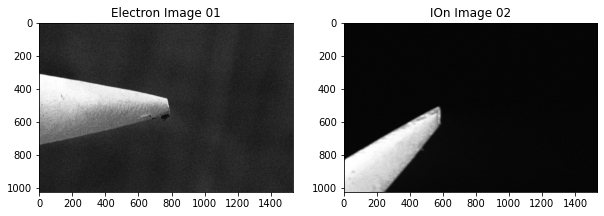

2023-03-13 16:17:48,967 — root — INFO — autocontrast:539 — Running autocontrast on ELECTRON.
2023-03-13 16:17:49,534 — root — INFO — acquire_image:462 — acquiring new ELECTRON image.
2023-03-13 16:17:51,548 — root — INFO — autocontrast:539 — Running autocontrast on ION.
2023-03-13 16:17:52,127 — root — INFO — acquire_image:462 — acquiring new ION image.


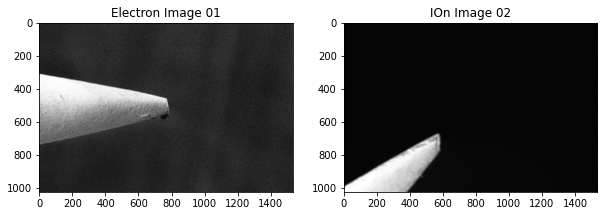

FibsemManipulatorPosition(x=-4.409401242552162e-08, y=-1.1421869235978519e-05, z=1.6319333132033217e-05, r=0.0, t=0.0, coordinate_system='Stage')

In [22]:
# microscope.insert_manipulator()
settings.image.hfw = 400e-6
images = acquire.take_reference_images(microscope, settings.image)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(10, 7))
ax[0].imshow(images[0].data, cmap="gray")
ax[0].set_title("Electron Image 01")
ax[1].imshow(images[1].data, cmap="gray")
ax[1].set_title("IOn Image 02")
plt.show()

# #position = FibsemManipulatorPosition(x=20e-6, y=20e-6, z=20e-6, r=0, t=0)
# microscope.move_manipulator_corrected(dx = 20e-6, dy = 20e-6, beam_type=BeamType.ELECTRON)
position = FibsemManipulatorPosition(z=20e-6)
microscope.move_manipulator_to_position_offset(position, name="EUCENTRIC")

images_new = acquire.take_reference_images(microscope, settings.image)
fig, ax = plt.subplots(1, 2, figsize=(10, 7))
ax[0].imshow(images_new[0].data, cmap="gray")
ax[0].set_title("Electron Image 01")
ax[1].imshow(images_new[1].data, cmap="gray")
ax[1].set_title("IOn Image 02")
plt.show()
microscope.get_manipulator_position()


## Gas Injection System


In [2]:
%load_ext autoreload
%autoreload 2

from fibsem.structures import BeamType

from fibsem import utils, acquire, movement

microscope, settings = utils.setup_session()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2023-04-27 18:35:07,332 — root — INFO — connect_to_microscope:433 — Microscope client connecting to [10.0.0.1:7520]
Client connecting to [10.0.0.1:7520]...
Client connected to [10.0.0.1:7520]
2023-04-27 18:35:07,337 — root — INFO — connect_to_microscope:435 — Microscope client connected to [10.0.0.1:7520]
2023-04-27 18:35:07,338 — root — INFO — setup_session:228 — Finished setup for session: demo_2023-04-27-06-35-07PM
{'application_file': 'cryo_Pt_dep', 'gas': 'Pt cryo', 'position': 'cryo', 'hfw': 3e-05, 'length': 7e-06, 'time': 30.0}


In [3]:
from fibsem import gis

print(gis.gis_protocol)

{'application_file': 'cryo_Pt_dep', 'gas': 'Pt cryo', 'position': 'cryo', 'hfw': 3e-05, 'length': 7e-06, 'time': 30.0}


In [5]:
gis.sputter_platinum(microscope, gis.gis_protocol)

2023-04-27 21:02:01,221 — root — INFO — run_sputter:1453 — Sputtering with platinum for 30.0 seconds...
2023-04-27 21:02:42,023 — root — INFO — finish_sputter:1494 — Platinum sputtering process completed.


In [7]:
from fibsem.structures import FibsemStagePosition

pos = FibsemStagePosition(x=0, y=0, z=-1e-3, r=0, t=0)
microscope.move_stage_relative(pos)

2023-04-27 21:03:49,678 — root — INFO — move_stage_relative:725 — Moving stage by FibsemStagePosition(x=0, y=0, z=-0.001, r=0, t=0, coordinate_system=None).


In [9]:


print(state.absolute_position)
print(microscope.get_current_microscope_state().absolute_position)


2023-04-27 21:05:47,145 — root — INFO — move_stage_relative:725 — Moving stage by FibsemStagePosition(x=0, y=0, z=-0.001, r=0, t=0, coordinate_system=None).
2023-04-27 21:05:51,059 — root — INFO — move_stage_absolute:704 — Moving stage to FibsemStagePosition(x=-0.0098685, y=0.004241416666666667, z=0.03204243827160494, r=0.8552267147432282, t=4.292777486369914e-06, coordinate_system='Raw').
FibsemStagePosition(x=-0.0098685, y=0.004241416666666667, z=0.03204243827160494, r=0.8552267147432282, t=4.292777486369914e-06, coordinate_system='Raw')
FibsemStagePosition(x=-0.0098685, y=0.004241416666666667, z=0.03204221322016461, r=0.8552267147432282, t=4.292777486369914e-06, coordinate_system='Raw')


In [10]:
def sputter_whole_grid(microscope):

    # get current state
    state = microscope.get_current_microscope_state()

    # move down
    pos = FibsemStagePosition(x=0, y=0, z=-1e-3, r=0, t=0)
    microscope.move_stage_relative(pos)

    # sputter
    gis.sputter_platinum(microscope, gis.gis_protocol)

    # restore position
    microscope.move_stage_absolute(state.absolute_position)


sputter_whole_grid(microscope)

2023-04-27 21:07:15,053 — root — INFO — move_stage_relative:725 — Moving stage by FibsemStagePosition(x=0, y=0, z=-0.001, r=0, t=0, coordinate_system=None).
2023-04-27 21:07:28,601 — root — INFO — run_sputter:1453 — Sputtering with platinum for 30.0 seconds...
2023-04-27 21:08:03,651 — root — WARNING — run_sputter:1461 — Patterning state is Idle
2023-04-27 21:08:03,652 — root — WARNING — run_sputter:1462 — Consider adjusting the patterning line depth.
2023-04-27 21:08:08,503 — root — INFO — finish_sputter:1494 — Platinum sputtering process completed.
2023-04-27 21:08:08,505 — root — INFO — move_stage_absolute:704 — Moving stage to FibsemStagePosition(x=-0.0098685, y=0.004241416666666667, z=0.03204221322016461, r=0.8552267147432282, t=4.292777486369914e-06, coordinate_system='Raw').
